# Загрузка Pandas и очистка данных

In [339]:
import pandas as pd
import re
from datetime import datetime
import numpy as np
import seaborn as sns

In [340]:
df = pd.read_csv('main_task.csv')
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [341]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки


# Заполняем пропуски
fil = str(['Vegetarian Friendly'])
df['Cuisine Style'].fillna(value=fil,inplace=True) # Заполняю пустые значения самым частым значением 

df['Price Range'].fillna(value='$$ - $$$',inplace=True) # Заполняю пустые значения "среднеценовым" значением 



# Задание 4.1
# Варианты непустых значений
print('Варианты непустых значений - {}'.format(df['Price Range'].unique()))

# Количество среднеценовых ресторанов
print('Количество среднеценовых ресторанов - {}'.format(len(df[df['Price Range'] == '$$ - $$$'])))
print()

# Задание 4.2
print('Количество городов - {}'.format(len(df['City'].unique()))) # Количество городов

# Задание 4.3
# Количество типов кухонь
types = set() # Создаем set для хранения уникальных значений
cousines_all = []
for cousines in df['Cuisine Style']:
    cou = []
    for cousine in cousines[1:-1].split(', '):  #"Переделываем" 
        types.add(cousine)
        cou.append(cousine)
    cousines_all.append(cou)
print('Количество типов кухонь - {}'.format(len(types)))
        

# Кухня, которая, представлена в наибольшем количестве ресторанов

cousines_keys = {}
for item in types: 
    cousines_keys[item] = 0 # добавляем в словарь ключ, соответствующий кухне
for cousines in df['Cuisine Style']:
    for item in cousines[1:-1].split(', '):
        cousines_keys[item] += 1 # Увеличиваем ключ на 1 если соответсвующей кухни
        
max_cousine = {k:v for k, v in cousines_keys.items() if v == max(cousines_keys.values())}
print('Кухня, которая, представлена в наибольшем количестве ресторанов - {}'.format(max_cousine))


# Среднее количество кухонь в одном ресторане      
count_mean = []
for cousines in df['Cuisine Style']:
    count_mean.append(len(cousines[1:-1].split(', ')))

mean = sum(count_mean) / len(df['Cuisine Style'])
print('Среднее количество кухонь в одном ресторане - {}'.format(round(mean,1)))


# Задание 4.4


# Так как Reviews в фотмате str, преждем чем переделать в list очищаем от ненужных символов
def clear_str(item):
    item = item.replace('[', '')
    item = item.replace(']','')
    item = item.replace("'","")
    item = item.replace('"','')
    item = item.replace('#','')
    return item     
        
        
        
rewiew_len = [] # Для создания признака количество отзывов
rewies_all = []
date_diff = []
current_date = datetime.today() # Сегодняшнея дата
fresh_date = 99999 # Задаем максимальное значение для поиска минимального количества дней от последнего отзыва
max_days = 0 # Задаем минимальное значение для поиска максимального количества дней разницы между отзывами

for v,i in enumerate(df['Reviews']):
    # Создаем пустые переменные внутри цикла для удобного подсчета
    rewiews = []
    date = []
    i = clear_str(i)

    for item in i.split(', '):
        count = 0
        try: # Задаю try для поиска неккоректного времени
            if item and re.search('[a-zA-Z]', item):
                rewiews.append(item)
                
            elif item and re.search('[/]', item): 
                date.append(datetime.strptime(item, '%m/%d/%Y'))
                diff = current_date - datetime.strptime(item, '%m/%d/%Y')
                
                if diff.days < fresh_date:
                    fresh_date = diff.days
                    fresh = item
                    
            elif not item: # Если значение пустое задаю None и 0
                date.append(None)
                rewiews.append(None)
                break # Break если пустых значений 2 добавляем только 1
                
        except: # Если вышла ошибка неккоретного времени (Пример 10/10) задаю значение None и 0
            date.append(None)
            rewiews.append(None)
            break
    
    if len(date) > 1:
        # Было указанано что данные только о 2х отзывах, поэтому ели больше 2х берем последние 2
        diff = date[-2]-date[-1]
        # Сохраняем разницу в датах на потом ( Ставим всегда позитивное число в разнице)
        date_diff.append(abs(diff.days)) # Так как возможно даты были перевернуты
        if diff.days > max_days:
            max_days = diff.days
    else:
        date_diff.append(0)
    
    rewies_all.append(rewiews[-2:])
    rewiew_len.append(len(rewiews[-2:])) # Сохраняем количество отзывов на потом
    
print('Самый свежий отзыв - {}'.format(fresh))
print('Максимальное количество дней отделяет даты публикации отзывов - {}'.format(max_days))

Варианты непустых значений - ['$$ - $$$' '$$$$' '$']
Количество среднеценовых ресторанов - 32298

Количество городов - 31
Количество типов кухонь - 125
Кухня, которая, представлена в наибольшем количестве ресторанов - {"'Vegetarian Friendly'": 20472}
Среднее количество кухонь в одном ресторане - 2.6
Самый свежий отзыв - 02/26/2018
Максимальное количество дней отделяет даты публикации отзывов - 3207


In [342]:
# Создадим разницу в цене из чисел

price_values = []
for i,v in enumerate(df['Price Range']):
    if v == '$':
        price_values.append(0)
    elif v == '$$ - $$$':
        price_values.append(1)
    else:
        price_values.append(2)

# Посчитаем количество типов кухонь
cousines_all = []
for i,v in enumerate(df['Cuisine Style']):
    cousines = []
    v = clear_str(v)
    for cousine in v.split(', '):
        cousines.append(cousine)
        
    cousines_all.append(len(cousines))


# Для теста заполним пропуски в Number of Reviews средним значением "124"
df['Number of Reviews'].fillna(value=124.0,inplace = True)

# Оставляем в колонке отзывов только отзывы
df['Reviews'] = rewies_all


# Поищем очевидно позитивные, негативные отзывы остальные нейтральные
positive = ['good', 'nice','best', 'delicious','not bad',
            'lovely','great','amazing','tasty','pleasant','yummy','excellent','top','superb','wonderful','worth']

negative = ['bad', 'disappointing','horrible','avoid','wasting','Terrible','slow','cold']
all_votes = []
for i,reviews in enumerate(df['Reviews']):
    review_vote = []
    for i in reviews:
        if i is not None and any(p in i.lower() for p in positive):
            review_vote.append('Positive')
        elif i is not None and any(n in i.lower() for n in negative):
            review_vote.append('Negative')
        else: 
            review_vote.append('Neutral')
    
    all_votes.append(review_vote) # Запишем полученные оценки на потом

In [378]:
# Создаем признаки

df['Price'] = price_values
df['Nr.Reviews'] = rewiew_len
df['Date Difference'] = date_diff
df['Nr.Cousines'] = cousines_all

# Создание dummy признаков из оценок
votes = pd.DataFrame(all_votes,columns=['Review_1','Review_2']) # Создаем дата фрейм из оценок
votes = pd.get_dummies(votes) # Создаем dummy признаки
df = pd.concat([df,votes], axis=1) # Объединим фреймы

# Создание dummy признаков из городов
cities = df['City'].apply(lambda i: i.lower()) # Создаем дата фрейм из городов
dummmy_cities = pd.get_dummies(cities) # Создаем dummy признаки
df = pd.concat([df,dummmy_cities], axis=1) # Объединим фреймы

# Создание dummy признаков из цен Так как рейтинг не всегда зависит от цен, выше цена не значит лучше!
# Пример: дешевые забегаловки с высокими оценками и наоборотъ
prices = df['Price Range']
dummy_prices = pd.get_dummies(prices)
df = pd.concat([df,dummy_prices], axis=1) # Объединим фреймы

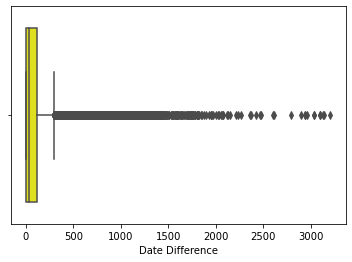

In [323]:
# Очистка
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]
# Поищем выбросы в количестве отзывов
sns.boxplot(df['Date Difference'], color='yellow');
# Удалим выбрсы
o = outliers_iqr(df['Date Difference'])
df.drop(o, inplace = True)
# Удалим ненужные стлбцы
df = df.drop(['City','URL_TA','ID_TA'], axis = 1)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [325]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id','Cuisine Style','Rating','Price Range','Reviews'], axis = 1)
y = df['Rating']
X

,Ranking,Number of Reviews,Price,Nr.Reviews,Date Difference,Nr.Cousines,Review_1_Negative,Review_1_Neutral,Review_1_Positive,Review_2_Negative,...,paris,prague,rome,stockholm,vienna,warsaw,zurich,$,$$ - $$$,$$$$
0,5570.0,194.0,1,2,41,3,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,353.0,688.0,2,2,2,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3458.0,3.0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,621.0,84.0,1,2,272,3,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,1419.0,2.0,1,2,108,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,14.0,1162.0,1,2,3,4,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
39994,7075.0,6.0,1,1,0,4,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
39995,500.0,79.0,1,2,34,4,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
39996,6341.0,542.0,1,2,9,5,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [326]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [327]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train

,Ranking,Number of Reviews,Price,Nr.Reviews,Date Difference,Nr.Cousines,Review_1_Negative,Review_1_Neutral,Review_1_Positive,Review_2_Negative,...,paris,prague,rome,stockholm,vienna,warsaw,zurich,$,$$ - $$$,$$$$
35978,1122.0,10.0,1,2,107,5,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14402,2530.0,34.0,1,2,38,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
25555,580.0,200.0,1,2,23,5,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
11318,454.0,12.0,1,2,88,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
11243,594.0,38.0,1,2,18,7,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39259,2028.0,148.0,1,2,8,2,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4405,350.0,1420.0,1,2,2,7,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
38877,3884.0,139.0,1,2,125,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6127,3779.0,120.0,1,2,28,2,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


# Создаём, обучаем и тестируем модель

In [328]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [329]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [330]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21210355809356465
